# Old (Dropped) Task Analysis

In [35]:
%matplotlib inline

from os.path import join as pjoin

import numpy as np
import matplotlib.pyplot as plt

## Settings

In [36]:
# Set path to load results from
res_path = '/Users/tom/Documents/Research/1-Projects/fooof/2-Data/Results/G2'

# Set average function to use
avg_func = np.nanmean
#avg_func = np.nanmedian

srate = 512
tmin, tmax = -0.85, 1.1

## Functions

In [46]:
def plot_alpha_response_compare(canonical_alpha, fooofed_alpha, t_win, srate):
    """Plot the alpha response results.

    Note: both inputs should [n_conds, n_times] matrices.
    """

    # Plot alpha response between different alpha filters
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[16, 6])
    times = np.arange(t_win[0], t_win[1], 1/srate)

    # Canonical alpha
    ax1.set_title('Canonical Alpha')
    ax1.plot(times, canonical_alpha[0, :], 'b', label='Load-1')
    ax1.plot(times, canonical_alpha[1, :], 'g', label='Load-2')
    ax1.plot(times, canonical_alpha[2, :], 'y', label='Load-3')

    ax2.set_title('FOOOFed Alpha')
    ax2.plot(times, fooofed_alpha[0, :], 'b', label='Load-1')
    ax2.plot(times, fooofed_alpha[1, :], 'g', label='Load-2')
    ax2.plot(times, fooofed_alpha[2, :], 'y', label='Load-3');

    # Restrict x-axis plotting
    ax1.set_xlim([-0.5, 1.0])
    ax2.set_xlim([-0.5, 1.0])

    ax1.legend(); ax2.legend();

### Task Related - Filtered Alpha Response

Blehhhh. Old Analysis - to be scrapped [Ignore this Analysis.]

In [47]:
# Load data
#   Note: Data is organized as [n_subjs, n_loads, n_times]
canonical_group = np.load(pjoin(res_path, 'Group', 'canonical_group.npy'))
fooofed_group = np.load(pjoin(res_path, 'Group', 'fooofed_group.npy'))

In [48]:
# Partition group
subset = 'all' # 'young', 'old', 'all'
if subset == 'old':
    canonical_group = canonical_group[0:15, :, :]
    fooofed_group = fooofed_group[0:15, :, :]
if subset == 'young':
    canonical_group = canonical_group[15:, :, :]
    fooofed_group = fooofed_group[15:, :, :]
if subset == 'all':
    canonical_group = canonical_group
    fooofed_group = fooofed_group

In [49]:
# Average across subjects
canonical_group_avg = avg_func(canonical_group, 0)
fooofed_group_avg = avg_func(fooofed_group, 0)

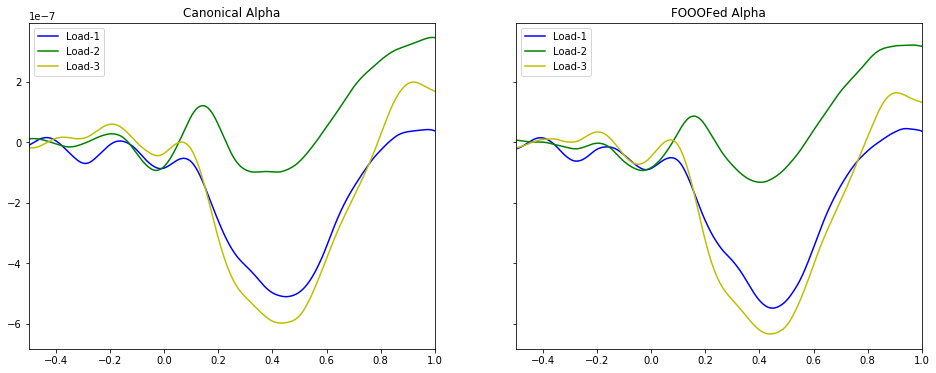

In [50]:
# Plot the alpha response - group average
plot_alpha_response_compare(canonical_group_avg, fooofed_group_avg, [tmin, tmax], srate)

In [51]:
# Plot each individual subject
#for alpha_subj, fooof_subj in zip(canonical_group, fooofed_group):
#    plot_alpha_response_compare(alpha_subj, fooof_subj, [tmin, tmax], srate)

In [52]:
# Grab the time that represent the late time period: 0.8 - 1.0
times = np.arange(tmin, tmax, 1/srate)
late_times = np.array(times >= 0.8) & np.array(times <= 1.0)

In [53]:
# Extract late time period, and average across it
#canonical_group_late = np.mean(canonical_group[:, :, late_times], 2)
#fooofed_group_late = np.mean(fooofed_group[:, :, late_times], 2)

canonical_group_late = np.median(canonical_group[:, :, late_times], 2)
fooofed_group_late = np.median(fooofed_group[:, :, late_times], 2)

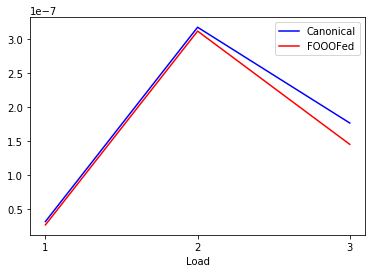

In [54]:
# Plot group average alpha power, per load, in late window, for canonical & fooofed bands
plt.figure()
plt.plot(avg_func(canonical_group_late, 0), 'b', label='Canonical')
plt.plot(avg_func(fooofed_group_late, 0), 'r', label='FOOOFed')
plt.xticks([0, 1, 2], [1, 2, 3]);
plt.xlabel('Load')
plt.legend();